## Modelos de regresión lineal
### Modelos con datos simulados
* El modelo de regresión lineal busca esto:  y = a + b * x
* X : 100 valores distribuídos según una N(1.5, 2.5)
* Ye = 6 + 2.0 * x + e
* E estará distribuída según una N(0, 0.8)

In [2]:
import pandas as pd
import numpy as np

In [4]:
x = 1.5 + 2.5 * np.random.randn(100)

In [5]:
res = 0 + 0.8 * np.random.randn(100)

In [6]:
y_pred = 6 + 2.0 * x

In [7]:
y_act = 6 + 2.0 * x + res

In [8]:
x_list = x.tolist()
y_pred_list = y_pred.tolist()
y_act_list = y_act.tolist()

In [10]:
data = pd.DataFrame(
    {
        "x":x_list,
        "y_act":y_act_list,
        "y_pred":y_pred_list
    }
)

In [11]:
data

,x,y_act,y_pred
0,0.493835,8.762308,6.987669
1,0.545492,5.891227,7.090984
2,1.456657,7.981715,8.913313
3,-0.439428,5.557438,5.121145
4,-0.813422,3.144784,4.373155
...,...,...,...
95,3.690261,12.141992,13.380522
96,-1.483063,1.308837,3.033873
97,2.956486,11.660914,11.912972
98,-0.500374,5.448085,4.999253


In [12]:
import matplotlib.pyplot as plt

In [15]:
y_mean = [ np.mean(y_act) for i in range(1,len(x_list)+1)]

Text(0.5, 1.0, 'Valor actual VS predicción')

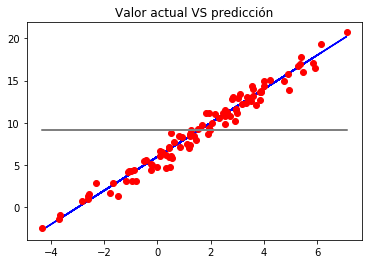

In [22]:
%matplotlib inline
plt.plot(x,y_pred,"b")
plt.plot(x,y_act,"ro")
plt.plot(x,y_mean,"grey")
plt.title("Valor actual VS predicción")

In [24]:
data["SSR"] = (data["y_pred"]-np.mean(y_act))**2
data["SSD"] = (data["y_pred"]-data["y_act"])**2
data["SST"] = (data["y_act"]-np.mean(y_act))**2

In [25]:
data.head()

,x,y_act,y_pred,SSR,SSD,SST
0,0.493835,8.762308,6.987669,4.536091,3.149342,0.126147
1,0.545492,5.891227,7.090984,4.106684,1.439416,10.408703
2,1.456657,7.981715,8.913313,0.041684,0.867875,1.289961
3,-0.439428,5.557438,5.121145,15.970690,0.190352,12.673893
4,-0.813422,3.144784,4.373155,22.508612,1.508895,35.673085


In [30]:
SSR = sum(data["SSR"])
SSD = sum(data["SSD"])
SST = sum(data["SST"])

In [29]:
SSR

2286.9132308890694

In [31]:
SSD

69.56940956961215

In [32]:
SST

2353.9978175304586

In [33]:
SSR+SSD

2356.4826404586815

In [34]:
R2 = SSR/SST

In [35]:
R2

0.9715018484121762

(array([ 4.,  6.,  7., 24., 19., 10., 12., 13.,  2.,  3.]),
 array([-1.77463842, -1.38528974, -0.99594106, -0.60659237, -0.21724369,
         0.17210499,  0.56145367,  0.95080236,  1.34015104,  1.72949972,
         2.1188484 ]),
 <a list of 10 Patch objects>)

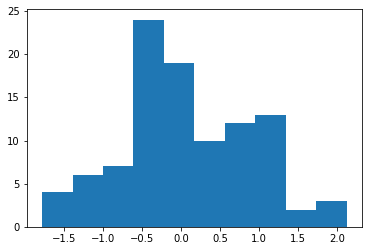

In [42]:
plt.hist(data["y_pred"]-data["y_act"])